In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure, davies_bouldin_score


In [ ]:
dt = pd.read_csv("D:\ML\ML 2 Projekt\Customer\Dataset\Mall_Customers.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\kowsh\AppData\Local\Temp\ipykernel_4508\3129065667.py:1: SyntaxWarning: invalid escape sequence '\M'
  dt = pd.read_csv("D:\ML\ML 2 Projekt\Data\Mall_Customers.csv")


In [54]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [55]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


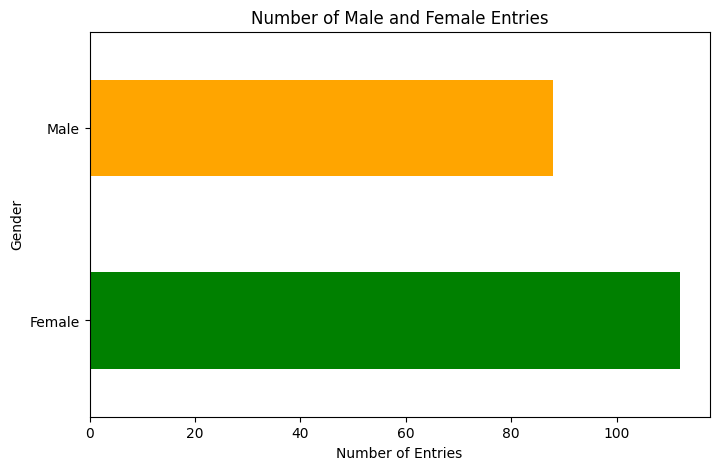

In [56]:
gender_counts = dt['Gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='barh', color=['green', 'orange'])
plt.xlabel('Number of Entries')
plt.ylabel('Gender')
plt.title('Number of Male and Female Entries')
plt.show()

In [57]:
print(dt["Gender"].unique())
dt["Gender"] = (dt["Gender"]=="Male").astype(int)
print(dt["Gender"].unique())


['Male' 'Female']
[1 0]


In [58]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [59]:
dt.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


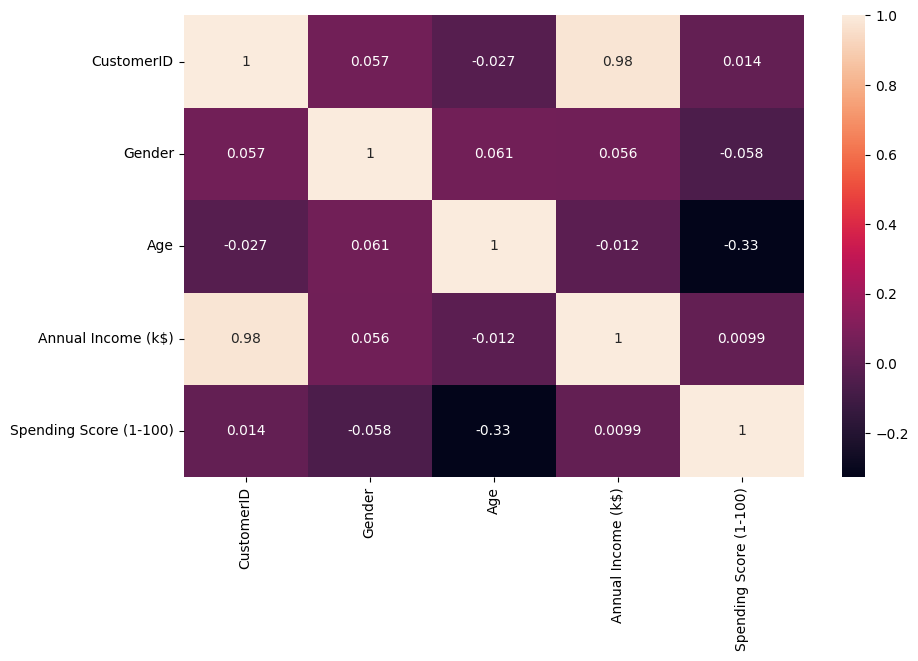

In [60]:
corr=np.corrcoef(dt.values.T)

plt.figure(figsize=(10,6))
hm = sn.heatmap(corr,annot=True,xticklabels=dt.columns,yticklabels=dt.columns)

In [61]:
dt=dt.drop(columns=["Age","CustomerID"])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [62]:
X = dt.iloc[:,[1,2]].values

wss=[]
for i in range(1,15):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(X)
    wss.append(km.inertia_)

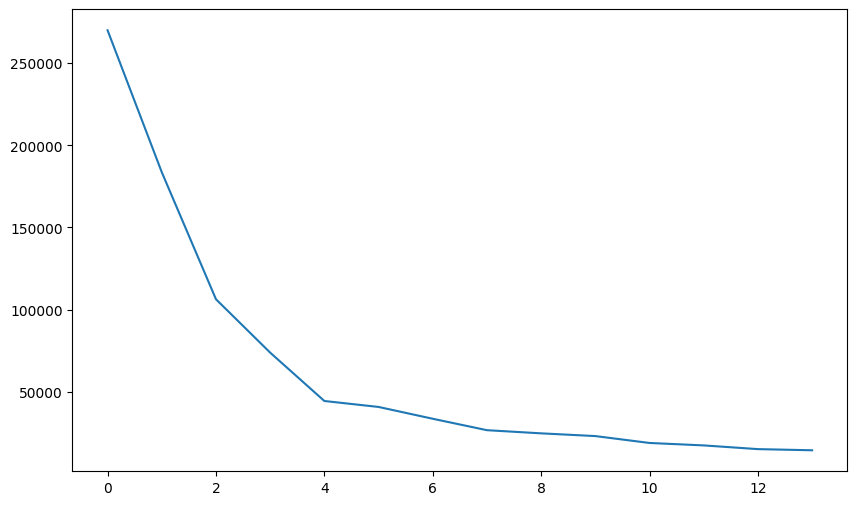

In [63]:
plt.figure(figsize=(10,6))
plt.plot(wss)
plt.show()

*5 optimal cluster*

*KMeans++ with 2 attributes*

In [64]:
km = KMeans(n_clusters=5,random_state=42,init="k-means++")
Y = km.fit_predict(X)

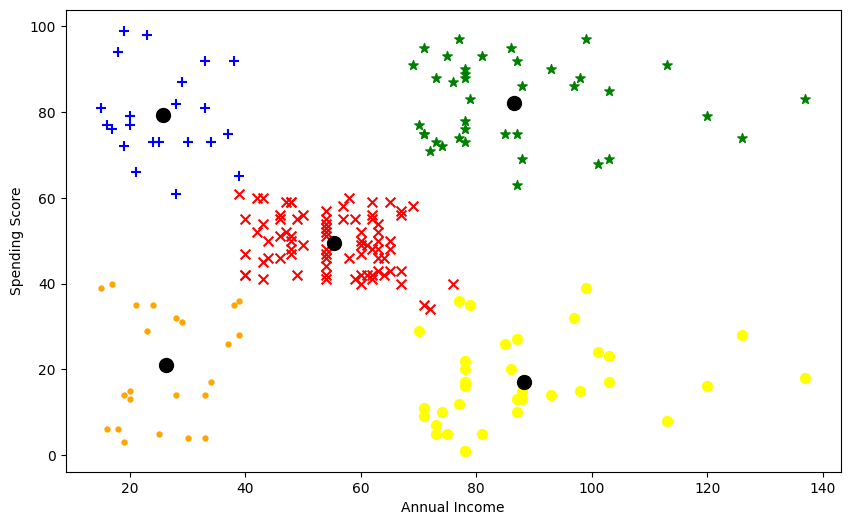

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0],X[Y==0,1],c="red",marker="x",s=50)
plt.scatter(X[Y==1,0],X[Y==1,1],c="green",marker="*",s=50)
plt.scatter(X[Y==2,0],X[Y==2,1],c="blue",marker="+",s=50)
plt.scatter(X[Y==3,0],X[Y==3,1],c="yellow",marker="o",s=50)
plt.scatter(X[Y==4,0],X[Y==4,1],c="orange",marker=".",s=50)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c="black",)

plt.show()

In [66]:
silhouette_avg = silhouette_score(X, Y)
print(f"Silhouette Score: {silhouette_avg}")


db_index = davies_bouldin_score(X, Y)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.553931997444648
Davies-Bouldin Index: 0.5725628995597082


*KMeans++ with 3 attributes*

In [67]:
km_n = KMeans(n_clusters=5,random_state=42,init="k-means++")
Y_n = km_n.fit_predict(dt.values)

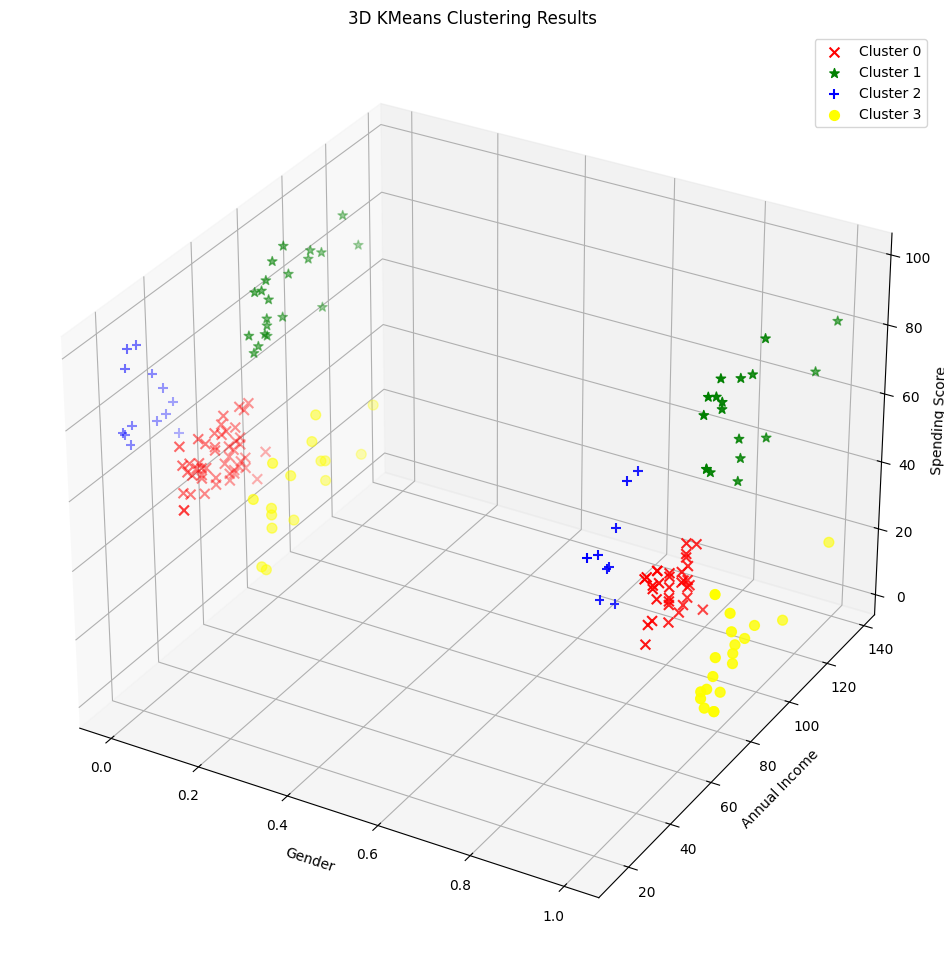

In [68]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dt.values[Y_n == 0, 0], dt.values[Y_n == 0, 1], dt.values[Y_n == 0, 2], c="red", marker="x", s=50, label="Cluster 0")
ax.scatter(dt.values[Y_n == 1, 0], dt.values[Y_n == 1, 1], dt.values[Y_n == 1, 2], c="green", marker="*", s=50, label="Cluster 1")
ax.scatter(dt.values[Y_n == 2, 0], dt.values[Y_n == 2, 1], dt.values[Y_n == 2, 2], c="blue", marker="+", s=50, label="Cluster 2")
ax.scatter(dt.values[Y_n == 3, 0], dt.values[Y_n == 3, 1], dt.values[Y_n == 3, 2], c="yellow", marker="o", s=50, label="Cluster 3")
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title("3D KMeans Clustering Results")
ax.legend()
plt.show()

In [76]:
silhouette_avg = silhouette_score(dt.values, Y_n)
print(f"Silhouette Score: {silhouette_avg}")
db_index = davies_bouldin_score(dt.values, Y_n)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.5534496268497305
Davies-Bouldin Index: 0.5731853446935522


*Hierarchical Clustering*

In [69]:
agg_clust = AgglomerativeClustering(n_clusters=5, linkage='ward')  
Y_hierarchical = agg_clust.fit_predict(dt)

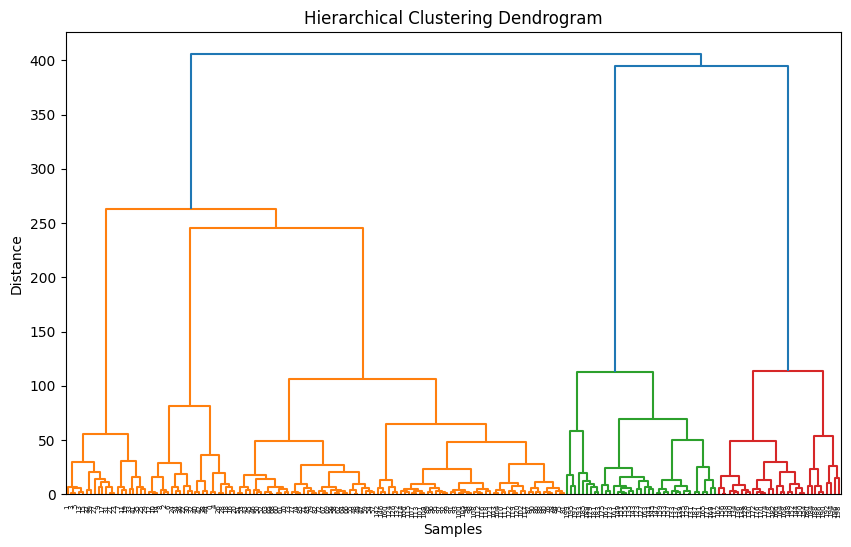

In [70]:
linkage_matrix = sch.linkage(dt, method='ward')
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [71]:
silhouette_avg = silhouette_score(dt, Y_hierarchical)
print(f"Silhouette Score: {silhouette_avg}")
db_index = davies_bouldin_score(dt.values, Y_hierarchical)
print(f"Davies-Bouldin Index: {db_index}")
ari_score = adjusted_rand_score(Y_hierarchical, Y_hierarchical)
print(f"Adjusted Rand Index: {ari_score}")

Silhouette Score: 0.5525220214112477
Davies-Bouldin Index: 0.5788230063822983
Adjusted Rand Index: 1.0


*Isolation Forest*

In [72]:
iso_forest = IsolationForest(n_estimators=50, contamination='auto', random_state=42)
Y_if = iso_forest.fit_predict(X) 
outliers = Y_if == -1
inliers = Y_if == 1

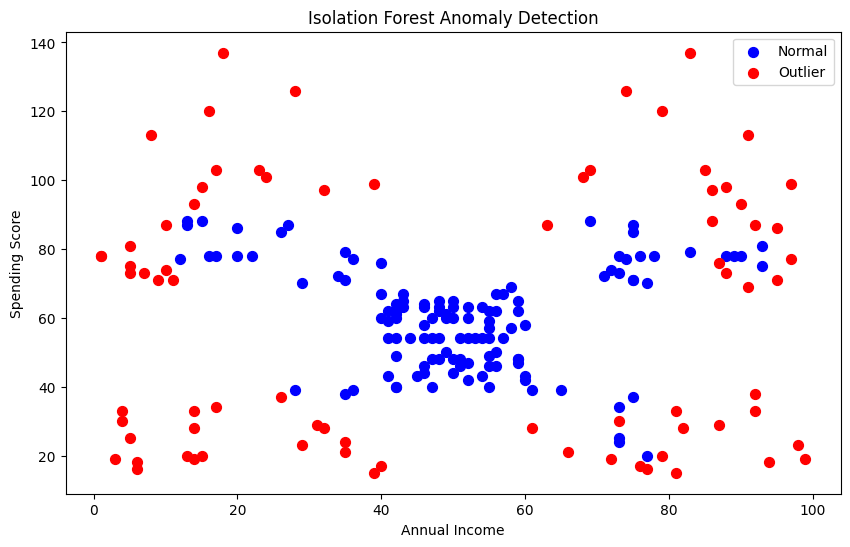

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(X[inliers, 1], X[inliers, 0], c="blue", label="Normal", s=50)
plt.scatter(X[outliers, 1], X[outliers, 0], c="red", label="Outlier", s=50)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [74]:
silhouette_avg = silhouette_score(X, Y_if)
print(f"Silhouette Score: {silhouette_avg}")
db_index = davies_bouldin_score(X, Y_if)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.22340970723964257
Davies-Bouldin Index: 17.841494946828597
